In [2]:
import numpy as np

In [407]:
class ANet:
    def __init__(self):
        pass
    def forward(self, x, w1, w2):
        a = np.dot(x, w1)
        z = np.tanh(a)
        y_pred=np.dot(z,w2)

        return z, y_pred
    
    def __tanh_derivative(self, x):
        return 1 - np.tanh(x)**2
    
    def backward(self, x, y, m, iters, lr, test_data):
        w1 = np.random.randn(x.shape[-1], m)
        w2 = np.random.randn(m, 1)

        errors = []
        test_err=[]
        for _ in range(iters):
            z, pred_y = self.forward(x, w1, w2)

            error = pred_y - y

            dw2 = np.dot(z.T, error)
            dw1 = np.dot(x.T, error.dot(w2.T) * self.__tanh_derivative(np.dot(x, w1)))

            w2 -= lr * dw2
            w1 -= lr * dw1

            errors.append(error**2)
            z,pred=self.forward(test_data[:,:-1], w1, w2)
            test_err.append((test_data[:,-1:]-pred)**2)

        return w1, w2, errors, test_err


In [229]:
a=ANet()
N, D, M = 5, 3, 30
X = np.random.randn(N, D)

y = np.random.randint(0, 1, size=(5, 1))

w1, w2, errors=a.backward(X, y, M, 100, 0.01)
_, pred=a.forward(X, w1, w2)
errors[-1]

array([[0.00000000e+00],
       [4.29066377e-29],
       [7.88860905e-31],
       [4.43734259e-31],
       [4.43734259e-31]])

In [239]:
import zipfile
import requests
import io

url = "http://archive.ics.uci.edu/static/public/186/wine+quality.zip"
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall("data")

red_wine = np.genfromtxt("data/winequality-red.csv", delimiter=';', skip_header=1)

In [322]:
test_data=red_wine[:red_wine.shape[0]//2]
train_data=red_wine[red_wine.shape[0]//2:]

In [323]:
for i in range(train_data.shape[1]):
    avg = np.average(train_data[:,i])
    std = np.std(train_data[:,i])
    for j in range(train_data.shape[0]):
        train_data[j][i]= (train_data[j][i]-avg)/std
    for j in range(test_data.shape[0]):
        test_data[j][i]= (test_data[j][i]-avg)/std

# add bias
test_data = np.append(np.ones((test_data.shape[0], 1)), test_data, 1)
train_data = np.append(np.ones((train_data.shape[0], 1)), train_data, 1)

In [408]:
net = ANet()
w1,w2, err, test_err=net.backward(train_data[:,:-1], train_data[:,-1:], 30, 1000, 0.0001, test_data)
# err[-1]


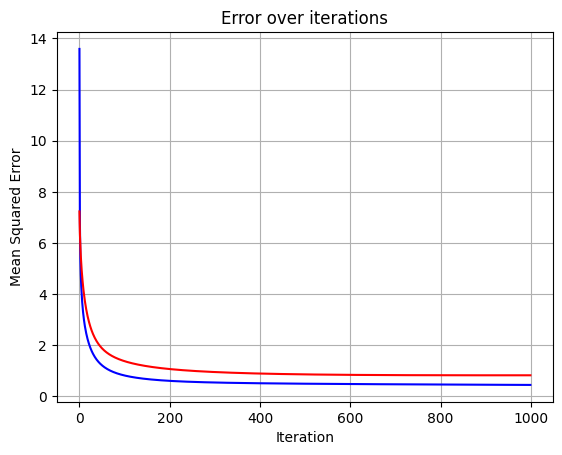

In [409]:
import matplotlib.pyplot as plt
plt.plot([np.mean(e) for e in err], color='blue')
plt.plot([np.mean(e) for e in test_err], color='red')
plt.title("Error over iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

In [410]:
z,pred=net.forward(test_data[:,:-1], w1, w2)

In [411]:
print(test_data[:,-1:]-pred)

[[ 0.26478826]
 [-1.05703638]
 [-0.76103767]
 [ 0.93378025]
 [ 0.26478826]
 [ 0.31841076]
 [ 0.26830036]
 [ 2.18187461]
 [ 2.07318041]
 [-1.17123836]
 [-0.19236975]
 [-1.17123836]
 [ 0.53469804]
 [-1.05143469]
 [-0.38216048]
 [-0.44088256]
 [ 1.15182431]
 [-0.3670225 ]
 [-0.39684743]
 [ 2.01632882]
 [ 0.99934698]
 [-2.12417678]
 [ 0.21459044]
 [-0.46223925]
 [ 0.57210861]
 [-0.9418159 ]
 [-1.08980391]
 [ 0.21459044]
 [ 0.27377807]
 [ 0.81500813]
 [-0.51232466]
 [ 0.6939915 ]
 [ 0.19852881]
 [ 0.76991036]
 [-1.53601885]
 [ 1.59497899]
 [ 0.8696412 ]
 [ 1.69661977]
 [-0.66023701]
 [-1.61994828]
 [-1.61994828]
 [-1.42918282]
 [ 0.89111345]
 [-0.97015069]
 [-0.69706128]
 [-2.02429444]
 [-0.2274306 ]
 [ 0.59160578]
 [-0.53643158]
 [-0.23162303]
 [-0.47489983]
 [ 0.35277634]
 [ 0.28311268]
 [-0.51764678]
 [ 0.8465788 ]
 [ 0.23060839]
 [-0.2819703 ]
 [ 0.54729142]
 [-0.71167877]
 [ 1.87407766]
 [-0.17566923]
 [-0.61790875]
 [ 1.92999779]
 [ 0.085525  ]
 [ 0.35956144]
 [ 0.35956144]
 [-0.37670